In [1]:
#!pip install python-twitter

# Part 1 - The network of retweets.

In [3]:
import pandas as pd
import re

In [5]:
df = pd.read_csv("H115_tw.csv", encoding = "utf-8")

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [7]:
G = nx.DiGraph()

In [8]:
#add nodes
'''for party, tw_name in zip(df["Party"], df["tw_name"]):
    G.add_node(tw_name, party=party)
    '''
for index, row in df.iterrows():
    name = row['tw_name']
    party_ = row['Party']
    G.add_node(name, party = party_)
len(G.nodes)

420

** Use a NetworkX DiGraph to store the network. Use weighted edges to account for multiple retweets. Store also the party of each member as a node attribute (use the data in this file, or the data you downloaded in Part 1). Remove self-loops (edges that connect a node with itself).**

In [9]:
reg_exp = r"RT @(.+?):"
tw_name = list(df["tw_name"])

In [11]:
for name in tw_name:
    #read the files with certain name from tweet folder
    raw = (open("tweets/%s" % name)).read()
    handles = re.findall(reg_exp, raw)
    for handle in handles:
        if(handle in tw_name and name != handle):
            nameH = name
            handleH = handle
            weight_ = handles.count(handle)
            G.add_edge(name, handle, name = nameH, handle = handleH, weight = weight_)
            #G.add_edge(name = nameH, handle = handleH, weight = weight_)

/Users/alexandraciobica/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


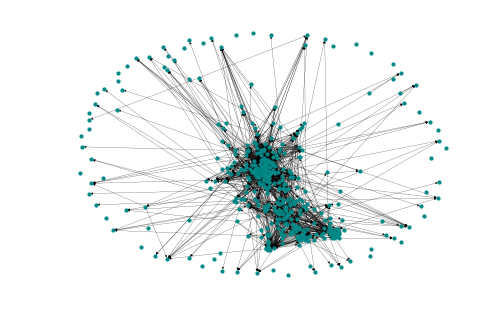

In [13]:
nx.draw_spring(G,node_size=10,node_color = '#018786', arrowsize = 5, width=0.2)

In [11]:
#make it undirected
U = G.to_undirected()

In [12]:
isolatedNodes = nx.isolates(U)
#list(isolatedNodes)
U.remove_nodes_from(list(isolatedNodes))

** Visualize the network using the Networkx draw function, and nodes coordinates from the force atlas algorithm (see Week 5, Exercise 2). Hint: use the undirected version of the graph to find the nodes positions for better results, but stick to the directed version for all measurements. Plot nodes in colors according to their party (e.g. 'red' for republicans and 'blue' for democrats) and set the nodes' size proportional to their total degree.
Compare the network of Retweets with the network of Wikipedia pages (Week 5, exercise 2). Do you observe any difference? How do you explain them?**

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 24.09it/s]


('BarnesHut Approximation', ' took ', '2.23', ' seconds')
('Repulsion forces', ' took ', '40.52', ' seconds')
('Gravitational forces', ' took ', '0.10', ' seconds')
('Attraction forces', ' took ', '0.38', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.33', ' seconds')


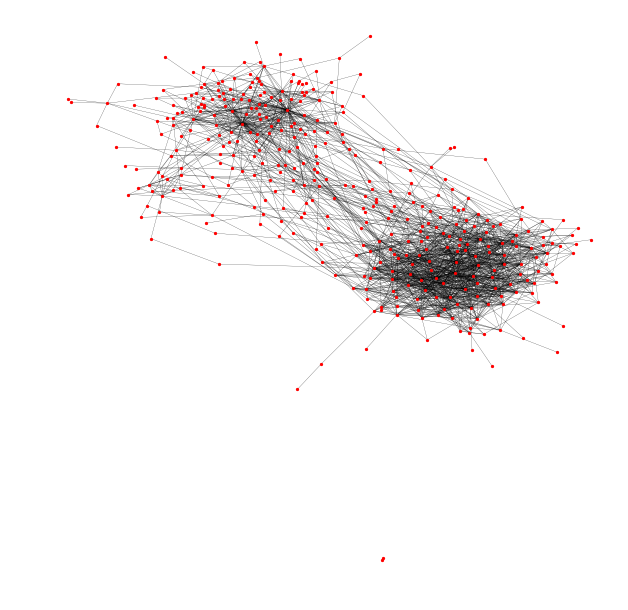

In [13]:
from fa2 import ForceAtlas2
from itertools import count

forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          edgeWeightInfluence=0.4,

                          # Performance
                          jitterTolerance=0.2,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=0.2,

                          # Tuning
                          scalingRatio=1.0,
                          strongGravityMode=False,
                          gravity=0.1,

                          # Log
                          verbose=True
)
    
positions = forceatlas2.forceatlas2_networkx_layout(U,pos=None, iterations=1000)
#enlage plot
plt.figure(3, figsize=(8,8))
nx.draw(U, positions, width = 0.2, node_size=5, with_labels=False)
plt.axis('off')
plt.show()

In [14]:
#groups = set(nx.get_node_attributes(G,'party').values())
#mapping = dict(zip(sorted(groups),count()))
#colors = [mapping[U.node[n]['party']] for n in nodes]

node_color = []

for node in U.nodes(data=True):
    if 'Republican' in node[1]["party"]:
        node_color.append('darkblue')
    else:
        node_color.append('firebrick')

** Now set the nodes' size proportional to their betweenness centrality. What do you observe?**

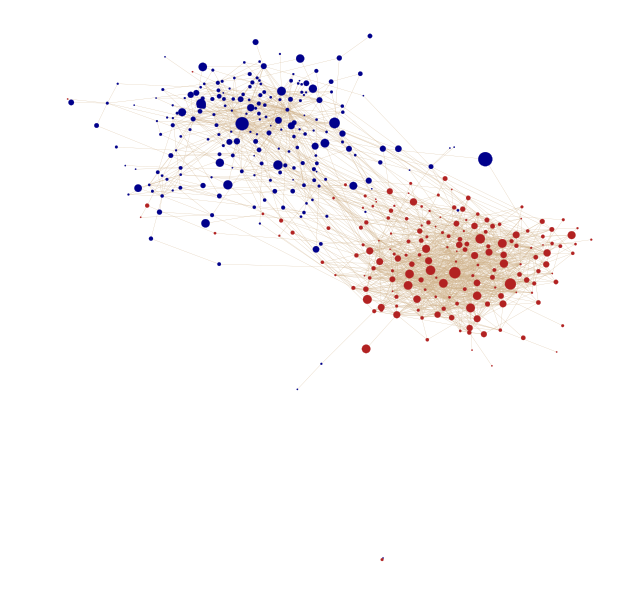

In [16]:
d =dict(nx.degree(U))
degrees = np.array(list(d.values()))

plt.figure(3,figsize=(8,8)) 
nx.draw(U, positions, node_color = node_color, node_size = 200*degrees/max(degrees),linewidths = 0.2,width = 0.2,edge_color = 'tan', with_labels=False)

plt.axis('off')
plt.show()

* Now set the nodes' size proportional to their betweenness centrality. What do you observe?

In [17]:
B_centrality = nx.betweenness_centrality(U, normalized = True)

#convert centrality from list to np array; so you can multiply by a constant for every value in numpy array
betweenness_centrality = np.array(list(B_centrality.values()))

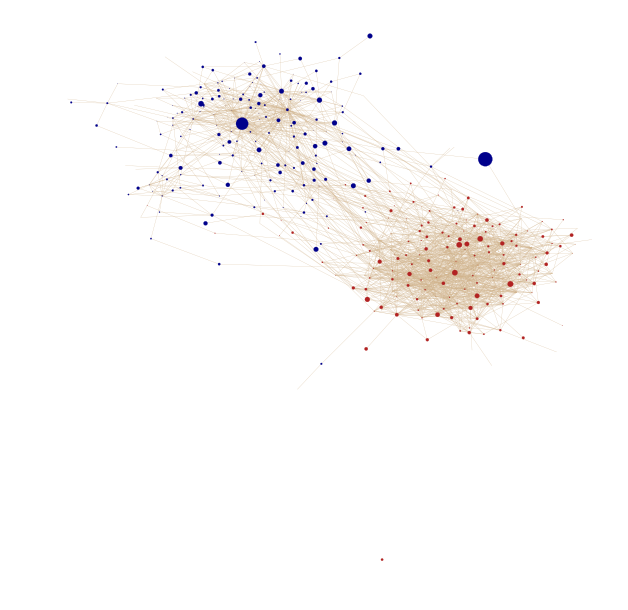

In [18]:
plt.figure(3,figsize=(8,8)) 
nx.draw(U, positions, node_color = node_color, node_size = 200*betweenness_centrality/max(betweenness_centrality),linewidths = 0.2,width = 0.2,edge_color = 'tan', with_labels=False)

plt.axis('off')
plt.show()

**Repeat the point above using eigenvector centrality instead. Is there any difference? Can you explain why?**

In [19]:
E_centrality = nx.eigenvector_centrality(U)

#centralDict = dict(B_centrality)

#convert centrality from list to np array; so you can multiply by a constant for every value in numpy array
eigenvector_centrality = np.array(list(E_centrality.values()))

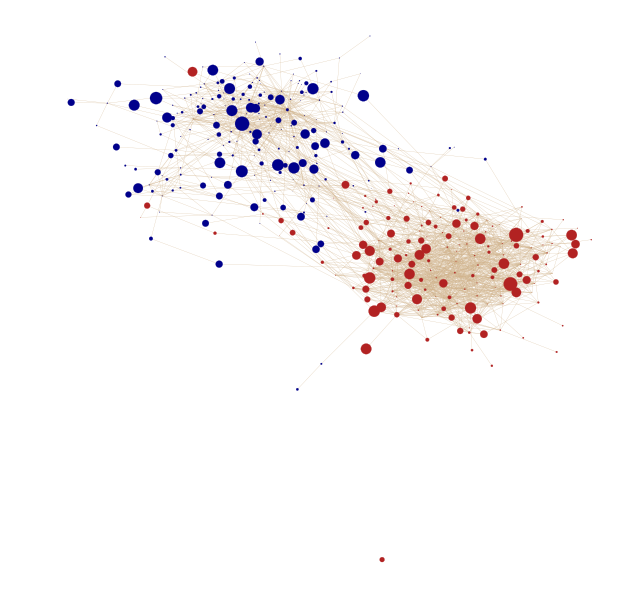

In [20]:
plt.figure(3,figsize=(8,8)) 
nx.draw(U, positions, node_color = node_color, node_size = 200*eigenvector_centrality/max(eigenvector_centrality),linewidths = 0.2,width = 0.2,edge_color = 'tan', with_labels=False)

plt.axis('off')
plt.show()

* Who are the three nodes with highest degree within each party? And eigenvector centrality? And betweenness centrality?

In [2]:
republicans = dict(filter(
lambda x: x[0] if x[1]['party'] == 'Republican' else False,
U.nodes(data=True)))

NameError: name 'U' is not defined

In [22]:
democratics = dict(filter(
lambda x: x[0] if x[1]['party'] == 'Democratic' else False,
U.nodes(data=True)))

In [1]:
republicNames = republicans.keys()
democraticNames = democratics.keys()
degreeDictRepublic = {}
degreeDictDemocratic = {}
for name, value in d.items():
    if name in republicNames:
        degreeDictRepublic[name] = value
republicNames

NameError: name 'republicans' is not defined

In [24]:
for name, value in d.items():
    if name in democraticNames:
        degreeDictDemocratic[name] = value

In [25]:
import operator

In [26]:
#Top 3 Republicans by degree
sorted(degreeDictRepublic.items(), key=operator.itemgetter(1), reverse = True)[:3]

[(u'SpeakerRyan', 90), (u'SteveScalise', 77), (u'GOPLeader', 41)]

In [27]:
#Top 3 Democratics by degree
sorted(degreeDictDemocratic.items(), key=operator.itemgetter(1), reverse = True)[:3]

[(u'NancyPelosi', 57), (u'WhipHoyer', 55), (u'repmarkpocan', 50)]

In [28]:
eigenDictRepublic = {}
eigenDictDemocratic = {}
for name, value in E_centrality.items():
    if name in republicNames:
        eigenDictRepublic[name] = value

In [29]:
#Top 3 Republicans by eigenvector centrality
sorted(eigenDictRepublic.items(), key=operator.itemgetter(1), reverse = True)[:3]

[(u'RepDanDonovan', 0.015721758025713267),
 (u'RosLehtinen', 0.015319110680810339),
 (u'RepDaveTrott', 0.014096819488763804)]

In [30]:
for name, value in E_centrality.items():
    if name in democraticNames:
        eigenDictDemocratic[name] = value

In [31]:
#Top 3 Democratics by eigenvector centrality
sorted(eigenDictDemocratic.items(), key=operator.itemgetter(1), reverse = True)[:3]

[(u'NancyPelosi', 0.23920526338434575),
 (u'repmarkpocan', 0.2332112888598916),
 (u'WhipHoyer', 0.22111923427054733)]

In [32]:
betweenDictR = {}
betweenDictD = {}
for name, value in B_centrality.items():
    if name in republicNames:
        betweenDictR[name] = value

In [33]:
#Top 3 Republicans by betweenness  centrality
sorted(betweenDictR.items(), key=operator.itemgetter(1), reverse = True)[:3]

[(u'SpeakerRyan', 0.2248513819633209),
 (u'SteveScalise', 0.168124791830175),
 (u'RosLehtinen', 0.03406292298731955)]

In [34]:
for name, value in B_centrality.items():
    if name in democraticNames:
        betweenDictD[name] = value

In [35]:
#Top 3 Democratics by betweenness  centrality
sorted(betweenDictD.items(), key=operator.itemgetter(1), reverse = True)[:3]

[(u'WhipHoyer', 0.035980442836512805),
 (u'NancyPelosi', 0.03382981596898697),
 (u'RepLindaSanchez', 0.03192936546827751)]

* Plot on the same figure the distribution of outgoing strength for the republican and democratic nodes (e.g. the sum of the weight on outgoing links). Which party is more active in retweeting other members of the house?

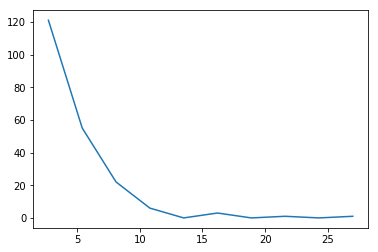

In [36]:
repHist = np.histogram([G.out_degree()[n] for n in republicNames])
plt.plot(repHist[1][1:], repHist[0])
#second list is border for bins  and we start from value 1
#first list are out values

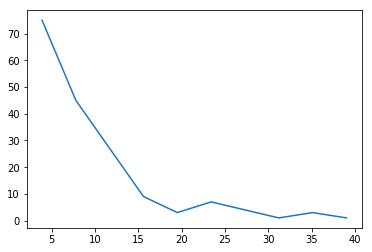

In [37]:
demHist = np.histogram([G.out_degree()[n] for n in democraticNames])
plt.plot(demHist[1][1:], demHist[0])
#second list is border for bins  and we start from value 1
#first list are out values

* **Find the 3 members of the republican party that have retweet more often tweets from democratic members. Repeat the measure for the democratic members. Can you explain your results by looking at the Wikipedia pages of these members of the house?**

In [38]:
all_edges = dict(G.edges().keys())

In [39]:
nb_retweets = nx.get_edge_attributes(G, 'weight')

politician = nx.get_edge_attributes(G, 'name')

retweeded = nx.get_edge_attributes(G, 'handle')

In [40]:
w_dict = nx.get_edge_attributes(G, 'weight')

for n in republicans:
    d_retw = np.array([w_dict[(n,m)] for m in democraticNames if (n,m) in w_dict.keys()])
    r_retw = np.array([w_dict[(n,m)] for m in republicNames if (n,m) in w_dict.keys()])
    if np.sum(d_retw) > np.sum(r_retw):
        print("Republican: " + n )

Republican: RepTedBudd
Republican: RepGrothman
Republican: RepWalorski
Republican: RepPoliquin
Republican: RepRatcliffe
Republican: RepFredUpton
Republican: RepTomMarino
Republican: RepTrey
Republican: RepTomMacArthur
Republican: RepSanfordSC
Republican: RepBrianMast
Republican: RepNewhouse
Republican: RepRyanCostello
Republican: RepTomReed


**Exercise 4: Community detection.**